In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_39/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>

# Evaluación de modelos de clasificación

<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_intro)

[Imports](#section_imports)

[Dataset](#section_dataset)

[Matriz de confusión](#section_confusion_matrix)

[Error tipo I](#section_error_type_i)

[Error tipo II](#section_error_type_ii)

[Accuracy](#section_accuracy)

[Recall / Sensitivity / TPR](#section_recall)

[Precision](#section_precision)

[Relación entre precision y recall](#section_precision_recall)

[Specificity](#section_specificity)

[F1 Score](#section_f1)

[Resumen](#section_resumen)

[Curva ROC - AUC Score](#section_roc)

[PR Curve](#section_pr)

[Referencias](#section_referencias)



<a id="section_intro"></a> 
## Intro

[volver a TOC](#section_toc)

En esta guía, veremos las siguientes métricas para evaluar el rendimiento de cualquier modelo de clasificación:


* Matriz de confusión
* Error tipo I
* Error tipo II
* Exactitud
* Recall o tasa positiva verdadera o sensibilidad
* Precisión
* Especificidad
* F1 Score
* Curva ROC- AUC
* Curva PR

Vamos a usar distintas medidas de evaluación dependiendo si el output del modelo son etiquetas o probabilidades, y si las clases están balanceadas o desbalanceadas. 

 <img src='./img/1_model_performance_metrics.png' align='left' />

<a id="section_imports"></a> 
## Imports

[volver a TOC](#section_toc)

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

<a id="section_dataset"></a> 
## Dataset

[volver a TOC](#section_toc)

En esta guía usaremos el dataset iris (https://archive.ics.uci.edu/ml/datasets/iris), que viene con la bilbioteca sklearn, para mostrar cómo evaluar las métricas que presentamos.

Como la variable target de este dataset tiene tres categorías, vamos a eliminar la categoría 2 (50 registros) así el clasificador no es multiclase.


In [3]:
iris = datasets.load_iris()
X_raw = pd.DataFrame(iris.data)
y_raw = iris.target

to_drop_mask = y_raw == 2
to_keep_mask = np.logical_not(to_drop_mask)
sum(to_keep_mask)

X = X_raw.loc[to_keep_mask, :]
y = y_raw[to_keep_mask]


Vamos a agregar ruido a los valores de las variables predictoras para que la clasificación no sea perfecta, porque con este dataset casi cualquier modelo consigue una clasificación óptima.

Construimos los conjuntos de train y test, reservando para test el 30% de los registros.

Entrenamos en el modelo y los testeamos en los datos de test

In [4]:
# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

# Create a simple classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred_class = classifier.predict(X_test)
#print(y_class)

y_pred_score_classes = classifier.predict_proba(X_test)
y_pred_score = y_pred_score_classes[:, 1]
#print(y_score)

#nota: y_pred_score_classes tiene tantas columnas como clases se puedan predecir, nos quedamos con la que corresponde a la clase 1, que es la columna 1
# si nos quedáramos con la 0 tendríamos como scores la probabilidad de pertenecer a la clase 0, o sea querriamos predecir 0 en lugar de 1

<a id="section_confusion_matrix"></a> 
## Matriz de confusión

[volver a TOC](#section_toc)


<img src='./img/2_confusion_matrix.png' align='left' />
<br/>

TP (True-positives): el valor predicho por el modelo es "Yes" y el verdadero valor es "Yes"

TN (True-negatives): el valor predicho por el modelo es "No" y el verdadero valor es "No"

FP (False-positives): el valor predicho por el modelo es "Yes" y el verdadero valor es "No"

FN (False-negatives): el valor predicho por el modelo es "No" y el verdadero valor es "Yes"


**Documentación**

$C_{00}$: true negatives; $C_{10}$: false negative; $C_{11}$ true positives; $C_{01}$ false positives

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


In [5]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_class)
conf_mat

array([[ 9,  6],
       [ 1, 14]])

<a id="section_error_type_i"></a> 
## Error tipo I

[volver a TOC](#section_toc)

El error tipo I también se conoce como falsos positivos y ocurre cuando un modelo de clasificación predice incorrectamente un resultado verdadero para una observación originalmente falsa.

<img src='./img/3_type_i_error.png' align='left' />

**Documentación**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

La cantidad de falsos positivos está representada por el elemento (0,1) de la matriz de confusión


In [6]:
false_positives = conf_mat[0, 1]
false_positives

6

<a id="section_error_type_ii"></a> 
## Error tipo II

[volver a TOC](#section_toc)

El error de tipo II también se conoce como falsos negativos y ocurre cuando un modelo de clasificación predice incorrectamente un resultado falso para una observación originalmente verdadera.

<img src='./img/4_type_ii_error.png' align='left' />

**Documentación**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

La cantidad de falsos negativos está representada por el elemento (1, 0) de la matriz de confusión


In [7]:
false_negatives = conf_mat[1, 0]
false_negatives

1

Las tres métricas mencionadas anteriormente son métricas de propósito general, independientemente del tipo de datos de entrenamiento y test que tengamos y el tipo de algoritmo de clasificación que hayamos implementado.

Ahora veamos métricas que son adecuadas para un tipo particular de dataset.

<a id="section_accuracy"></a> 
## Accuracy (precisión)

[volver a TOC](#section_toc)

Comencemos hablando de precisión, esta es una métrica que se utiliza para datasets balanceados.

La precisión mide cuán cercanos son los resultados predichos al verdadero valor. 

$Accuracy = \frac{(TP+TN)}{(TP+FP+FN+TN)}$

<img src='./img/5_balance.png' align='left' />

<img src='./img/6_accuracy.png' align='left' />


**¿Por qué debemos usar accuracy sólo con datasets balanceados?**

Supongamos un modelo que fue entrenado y testeado sobre datasets desbalancedos.

La métrica accuracy vale 72%, y podría darnos la impresión de que nuestro modelo está haciendo un buen trabajo en la clasificación. 

Pero este modelo está haciendo un trabajo terrible al predecir la clase negativa. Solo predijo 20 resultados correctos de 100 observaciones negativas totales. 

Esta es la razón por la cual la métrica de precisión no debe usarse sobre datasets desbalanceados.

<img src='./img/7_accuracy_imbalance_problem.png' align='left' />

También podemos mirar cuál es el valor de accuracy del modelo si todas las instancias se clasifican con la etiqueta de la clase mayoritaria:

||Yes|No||
|---|:---:|:---|:---|
|Yes|900|100|<font color='red'>1000</font>|
|No|0|0|<font color='red'>0</font>|
||<font color='red'>900</font>|<font color='red'>100</font>|<font color='red'>1000</font>|

$Accuracy = \frac{TP+TN}{TP+FP+FN+TN}$

$Accuracy = \frac{900+0}{900+100+0+0}$

$Accuracy = 90\%$

Y aunque el modelo es muy malo, el valor de accuracy obtenido es bueno. 
Por lo tanto no es una buena métrica para medir la performance de modelos sobre datasets desbalanceados.

**Documentación**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html


In [8]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_class)
accuracy

0.7666666666666667

<a id="section_recall"></a> 
## Recall / Sensitivity / TPR (True Possitive Rate)

[volver a TOC](#section_toc)

Usaremos esta medida con datasets desbalanceados

Esta medida responde la pregunta ¿qué proporción de positivos reales se identificó correctamente?

Recall se usa en casos donde la detección positivos es de suma importancia. Por ejemplo en la predicción de cáncer, donde se requiere minimizar los falsos negativos, y esto implica que se debe maximizar recall.

<img src='./img/8_recall.png' align='left' />

$Recall = TRP = \frac{TP}{P} = \frac{TP}{TP + FN}$

**Documentación**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [9]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_class)
recall

0.9333333333333333

<a id="section_precision"></a>
## Precision

[volver a TOC](#section_toc)

Esta medida responde la pregunta ¿qué proporción de predichos positivos fue realmente correcta?

Precision se usa en casos en los que es de suma importancia no tener una gran cantidad de falsos positivos. Por ejemplo en detección de spam, un falso positivo es una observación que no era spam pero que nuestro modelo clasificó como spam. 

<img src='./img/10_precision.png' align='left' />

$Precision = \frac{TP}{TP + FP}$

**Documentación**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

In [10]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_class)
precision

0.7

<a id="section_precision_recall"></a> 
## Relación entre precision y recall

[volver a TOC](#section_toc)

<img src='./img/9_precision_recall.png' align='left' />

<a id="section_specificity"></a>
## Specificity

[volver a TOC](#section_toc)

Specificity o especificidad (también llamado true negative rate) mide la proporción de verdaderos negativos que son identificados correctamente.


<img src='./img/11_specificity.png' align='left' />

$Specificity = TNR =  \frac{TN}{N} = \frac{TN}{TN + FP}$

In [11]:
TN = conf_mat[0,0]
FP = conf_mat[0,1]
specificity = TN / (TN + FP)
specificity

0.6

<a id="section_f1"></a> 
## F1 Score

[volver a TOC](#section_toc)

Esta métrica depedende de precision y recall

Accuracy se usa cuando los verdadero positivos y los verdaderos negativos son más importantes, mientras que F1 score se usa cuando los falsos negativos y los falsos positivos lo son.

Accuracy se puede usar cuando las clase están balanceadeas, mientras que F1 score es una métrica  mejor cuando hay clases desbalanceadas.

En la mayoría de los problemas de clasificación de la vida real, existe una distribución de clases desbalanceada y, por lo tanto, la puntuación F1 es una mejor métrica para evaluar nuestro modelo.

<img src='./img/12_f1.png' align='left' />

**Documentación**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [12]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_class)
f1

0.8

<a id="section_resumen"></a> 
## Resumen

[volver a TOC](#section_toc)

<img src='./img/13_resumen.PNG' align='left' />


**Documentación**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [13]:
from sklearn.metrics import classification_report
classif_report = classification_report(y_test, y_pred_class)
print(classif_report)

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.70      0.93      0.80        15

    accuracy                           0.77        30
   macro avg       0.80      0.77      0.76        30
weighted avg       0.80      0.77      0.76        30



Hasta ahora vimos métricas de rendimiento de modelos de clasificación que predicen las etiquetas de clase. 

Veamos ahora las métricas para modelos que predicen basados en la probabilidad de pertenecer a una clase.

<a id="section_roc"></a> 
## Curva ROC - AUC Score

[volver a TOC](#section_toc)

Esta es una de las métricas más importantes utilizadas para medir el rendimiento de un modelo de clasificación y es muy popular entre los científicos de datos.

Para graficar la curva ROC representamos 
* en el eje x: (1-Specificity) que equivale a FPR
* en el eje y: Sensitivity que equivale a TPR

<img src='./img/14_roc_auc.jpeg' align='left' />



Comencemos por entender esto con un ejemplo. 

Tenemos un modelo de clasificación que proporciona valores de probabilidad que oscilan entre 0 y 1 para predecir la probabilidad de que una persona sea covid+. 

El puntaje de probabilidad cercano a 0 indica una probabilidad muy baja de que la persona considerada sea covid+, mientras que los valores de probabilidad cercanos a 1 indican una probabilidad muy alta de que una persona sea covid+. 

Ahora, por defecto si consideramos un umbral de 0.5, todas las personas asignadas a probabilidades ≤0.5 serán clasificadas como "No covid+" y las personas asignadas a probabilidades> 0.5 serán clasificadas como "covid+". 

Pero, podemos variar este umbral. ¿Qué pasa si lo hago 0.3 o 0.9? Veamos qué pasa.

Variando los valores del umbral y calculando los valores FPR y TPR para cada unos de esos umbrales, tenemos las coordenadas (x,y) que definen los puntos de la curva ROC. Observemos que cada punto de la curva corresponde a un valor de umbral distinto.

<img src='./img/15_roc_09.png' align='left' />
<img src='./img/16_roc_06.png' align='left' />
<img src='./img/17_roc_03.png' align='left' />
<img src='./img/18_roc_00.png' align='left' />

Entonces los puntos a representar son

<img src='./img/19_roc_values.png' align='left' />


Así podemos graficar la curva ROC para un modelo de clasificación, asignando diferentes umbrales y calculando las coordenas asociadas al valor umbral que es representado con un punto en la curva.

El área bajo la curva ROC se conoce como AUC, cuanto mayor es el valor de AUC mejor es el modelo.

Cuanto más lejos esté la curva ROC de la línea diagonal (y = x), mejor será el modelo. 

Así es como ROC-AUC nos permite evaluar el rendimiento de nuestros modelos de clasificación, y nos proporciona un medio para seleccionar un modelo.

**Documentación**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
    
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [14]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)

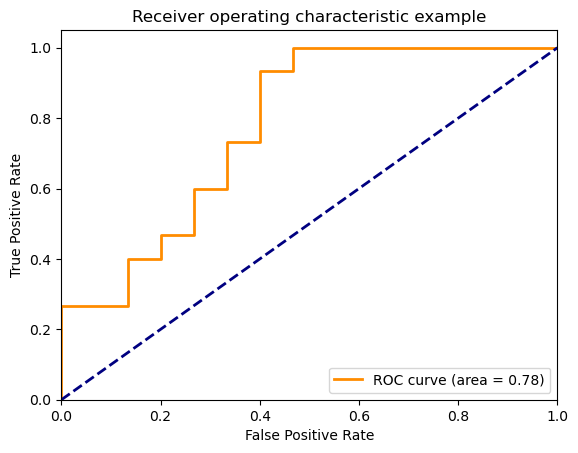

In [15]:
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<a id="section_pr"></a> 
## PR Curve

[volver a TOC](#section_toc)

En una curva PR, calcularmeos y representaremos 
* Precision en el eje Y
* Recall en el eje x

Dado que las curvas PR no consideran verdaderos negativos, sólo deben usarse cuando no nos preocupa la especificidad del clasificador. 



**Documentación**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

In [18]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_score)

print(precision)

print(recall)

print(thresholds)

[0.68181818 0.66666667 0.7        0.68421053 0.66666667 0.64705882
 0.6875     0.66666667 0.64285714 0.69230769 0.66666667 0.63636364
 0.7        0.66666667 0.75       0.71428571 0.66666667 0.8
 1.         1.         1.         1.         1.        ]
[1.         0.93333333 0.93333333 0.86666667 0.8        0.73333333
 0.73333333 0.66666667 0.6        0.6        0.53333333 0.46666667
 0.46666667 0.4        0.4        0.33333333 0.26666667 0.26666667
 0.26666667 0.2        0.13333333 0.06666667 0.        ]
[0.4264221  0.45045212 0.52368706 0.55535541 0.55696559 0.6331537
 0.64489964 0.6960941  0.70295091 0.70692937 0.72475689 0.74748905
 0.78035394 0.78073972 0.81548255 0.8214502  0.82217309 0.86200038
 0.86310383 0.89435738 0.94194275 0.94365091]


Para cada valor de thresholds, tenemos asociado un valor en la variable precision y uno en la variable recall, que son los valores que usamos como coordenadas en el gráfico que se presenta a continuación

0.7740081409818251


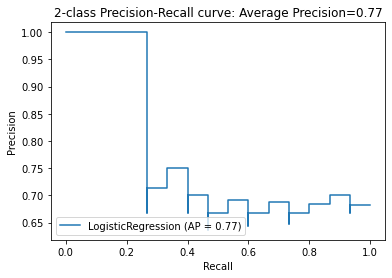

In [19]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_score)

print(average_precision)

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'Average Precision={0:0.2f}'.format(average_precision));

<a id="section_referencias"></a> 
## Referencias

[volver a TOC](#section_toc)

Top 10 model performance metrics for classification ML models
https://towardsdatascience.com/top-10-model-evaluation-metrics-for-classification-ml-models-a0a0f1d51b9

Accuracy vs. F1-Score https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2

Precision and Recall https://en.wikipedia.org/wiki/Precision_and_recall#F-measure

Accuracy and precision https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification

Confusion Matrix https://en.wikipedia.org/wiki/Confusion_matrix

Contingency table https://en.wikipedia.org/wiki/Contingency_table

F1 score https://en.wikipedia.org/wiki/F1_score

How to Use ROC Curves and Precision-Recall Curves for Classification in Python https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/